In [4]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\hp-pc\Miniconda3\envs\ashper\python.exe -m pip install --upgrade pip' command.


In [7]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200)  
train_path = 'Pattern_names'

for filename in os.listdir(train_path):
    sub = train_path + '/' + filename
    if (os.path.isdir(sub)):
        for image in os.listdir(sub):
            if image.split('.')[1] == 'png':
                img = cv2.imread(os.path.join(sub,image))

                # Spliting file names and storing the labels for image in list
                train_labels.append(filename)

                # Resize all images to a specific shape
                img = cv2.resize(img,shape)

                train_images.append(img)


# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

[1 0 0 0 0]


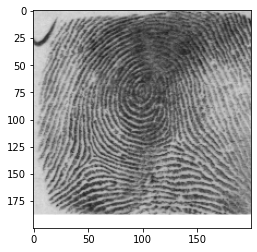

In [8]:
print(train_labels[0])
plt.imshow(train_images[0])

In [24]:
test_images = []       
test_labels = []
shape = (200,200)  
test_path = 'Pattern_names'

for filename in os.listdir(test_path):
    sub = test_path + '/' + filename
    if (os.path.isdir(sub)):
        for image in os.listdir(sub):
            if image.split('.')[1] == 'png':
                img = cv2.imread(os.path.join(sub,image))

                # Spliting file names and storing the labels for image in list
                test_labels.append(filename)

                # Resize all images to a specific shape
                img = cv2.resize(img,shape)

                test_images.append(img)

In [10]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [11]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 30)        0

In [12]:
# Training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
2/2 [==============================] - 11s 2s/step - loss: 1.6933 - acc: 0.0570 - val_loss: 2.0438 - val_acc: 0.1579
Epoch 2/50
2/2 [==============================] - 6s 1s/step - loss: 1.6573 - acc: 0.2472 - val_loss: 2.1067 - val_acc: 0.3158
Epoch 3/50
2/2 [==============================] - 6s 861ms/step - loss: 2.1011 - acc: 0.2595 - val_loss: 3.2014 - val_acc: 0.2632
Epoch 4/50
2/2 [==============================] - 7s 1s/step - loss: 3.6082 - acc: 0.1264 - val_loss: 3.5818 - val_acc: 0.1579
Epoch 5/50
2/2 [==============================] - 6s 890ms/step - loss: 2.5796 - acc: 0.2281 - val_loss: 2.5196 - val_acc: 0.1579
Epoch 6/50
2/2 [==============================] - 6s 893ms/step - loss: 1.8478 - acc: 0.2595 - val_loss: 1.7675 - val_acc: 0.3158
Epoch 7/50
2/2 [==============================] - 6s 861ms/step - loss: 1.7153 - acc: 0.2595 - val_loss: 1.9998 - val_acc: 0.3158
Epoch 8/50
2/2 [==============================] - 6s 911ms/step - loss: 2.3869 - acc: 0.2595 - val

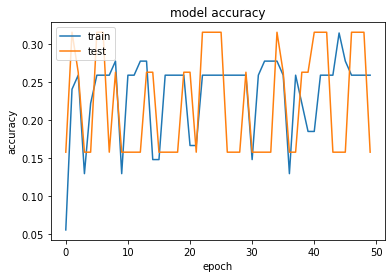

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

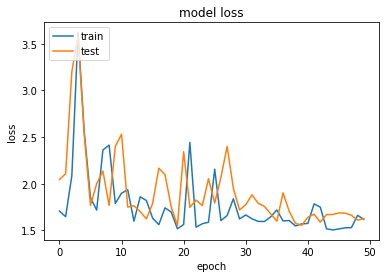

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

1/1 [==============================] - 0s 424ms/step - loss: 1.6262 - acc: 0.1579
[1.6262426376342773, 0.15789473056793213]


In [39]:
# Testing predictions and the actual label
checkImage = test_images[72:73]
checklabel = test_labels[72:73]

predict = model.predict(np.array(checkImage))

output = { 0:'W1',1:'W2',2:'W3',3:'W5', 4:'W7'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['W7']
Predicted :-  W1


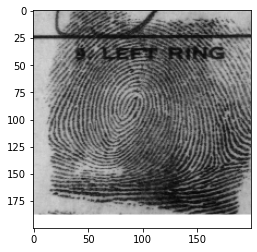

In [40]:
plt.imshow(checkImage[0])

In [20]:
model.save('test_version1.h5')

In [38]:
len(test_images)


73